In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

sns.set(rc={'figure.figsize':(10, 10)})

In [94]:
df = pd.read_csv('./high_diamond_ranked_10min.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [88]:
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [21]:
y = np.array(df['blueWins'])

X = df.drop(['blueWins', 'gameId'], axis = 1)
feature_list = list(X.columns)

X = np.array(X)

In [22]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [23]:
feature_list

['blueWardsPlaced',
 'blueWardsDestroyed',
 'blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueHeralds',
 'blueTowersDestroyed',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin',
 'redWardsPlaced',
 'redWardsDestroyed',
 'redFirstBlood',
 'redKills',
 'redDeaths',
 'redAssists',
 'redEliteMonsters',
 'redDragons',
 'redHeralds',
 'redTowersDestroyed',
 'redTotalGold',
 'redAvgLevel',
 'redTotalExperience',
 'redTotalMinionsKilled',
 'redTotalJungleMinionsKilled',
 'redGoldDiff',
 'redExperienceDiff',
 'redCSPerMin',
 'redGoldPerMin']

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [137]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (7409, 6)
Training Labels Shape: (7409,)
Testing Features Shape: (2470, 6)
Testing Labels Shape: (2470,)


In [138]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 2)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [139]:
y_pred = rf.predict(X_test)
y_pred = np.rint(y_pred)

In [140]:
from sklearn import metrics
print("Accuracy: " + str(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.7153846153846154


In [141]:
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)
print('Specificity: %f' %(tp / (tp + fp)))
print('Sensitivity: %f' %(tn / (tn + fn)))

Specificity: 0.935430
Sensitivity: 0.923930


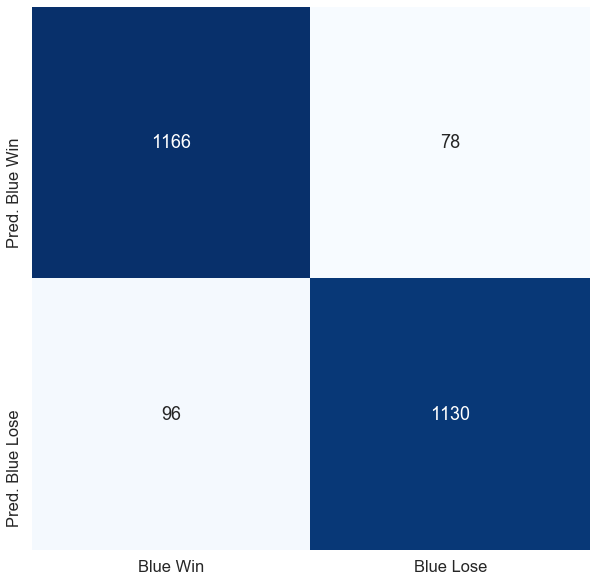

In [86]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Blue Win', 'Blue Lose'], yticklabels=['Pred. Blue Win', 'Pred. Blue Lose'])

In [36]:
feature_imp = pd.Series(rf.feature_importances_, index=feature_list).sort_values(ascending=False)
feature_imp

blueGoldDiff                    0.169723
redGoldDiff                     0.157221
redTotalExperience              0.044839
blueTotalExperience             0.044364
blueTotalJungleMinionsKilled    0.039358
redTotalJungleMinionsKilled     0.035970
blueWardsPlaced                 0.035747
redWardsPlaced                  0.035661
blueExperienceDiff              0.030034
redExperienceDiff               0.029138
redCSPerMin                     0.025782
redAssists                      0.024351
blueTotalMinionsKilled          0.024104
blueCSPerMin                    0.023991
blueAssists                     0.023708
blueTotalGold                   0.023495
redTotalMinionsKilled           0.023464
blueGoldPerMin                  0.022977
redWardsDestroyed               0.021690
blueWardsDestroyed              0.021673
redGoldPerMin                   0.021540
redTotalGold                    0.021361
blueAvgLevel                    0.012292
redAvgLevel                     0.011442
redKills        

No handles with labels found to put in legend.


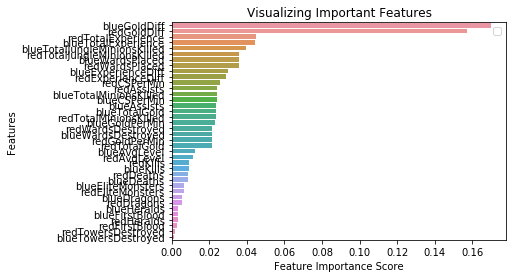

In [37]:
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [95]:
new_feature_list = feature_imp[feature_imp>0.02].index

In [96]:
new_feature_list

Index(['blueGoldDiff', 'redGoldDiff', 'redTotalExperience',
       'blueTotalExperience', 'blueTotalJungleMinionsKilled',
       'redTotalJungleMinionsKilled', 'blueWardsPlaced', 'redWardsPlaced',
       'blueExperienceDiff', 'redExperienceDiff', 'redCSPerMin', 'redAssists',
       'blueTotalMinionsKilled', 'blueCSPerMin', 'blueAssists',
       'blueTotalGold', 'redTotalMinionsKilled', 'blueGoldPerMin',
       'redWardsDestroyed', 'blueWardsDestroyed', 'redGoldPerMin',
       'redTotalGold'],
      dtype='object')

In [97]:
y2 = np.array(df['blueWins'])

X2 = df[new_feature_list]

X2 = np.array(X2)

In [98]:
y2

array([0, 0, 0, ..., 0, 0, 1])

In [99]:
X2

array([[ 6.4300e+02, -6.4300e+02,  1.7047e+04, ...,  2.0000e+00,
         1.6567e+03,  1.6567e+04],
       [-2.9080e+03,  2.9080e+03,  1.7438e+04, ...,  1.0000e+00,
         1.7620e+03,  1.7620e+04],
       [-1.1720e+03,  1.1720e+03,  1.7254e+04, ...,  0.0000e+00,
         1.7285e+03,  1.7285e+04],
       ...,
       [-2.4160e+03,  2.4160e+03,  1.9909e+04, ...,  1.0000e+00,
         1.8319e+03,  1.8319e+04],
       [-8.3900e+02,  8.3900e+02,  1.8314e+04, ...,  4.0000e+00,
         1.5298e+03,  1.5298e+04],
       [ 9.2700e+02, -9.2700e+02,  1.7379e+04, ...,  0.0000e+00,
         1.5339e+03,  1.5339e+04]])

In [100]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 2)

In [101]:
print('Training Features Shape:', X2_train.shape)
print('Training Labels Shape:', y2_train.shape)
print('Testing Features Shape:', X2_test.shape)
print('Testing Labels Shape:', y2_test.shape)

Training Features Shape: (7409, 22)
Training Labels Shape: (7409,)
Testing Features Shape: (2470, 22)
Testing Labels Shape: (2470,)


In [102]:
rf2 = RandomForestClassifier(n_estimators = 100, random_state = 2)

rf2.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [103]:
y2_pred = rf2.predict(X2_test)
y2_pred = np.rint(y2_pred)

In [104]:
print("Accuracy: " + str(metrics.accuracy_score(y2_test, y2_pred)))

Accuracy: 0.7161943319838057


In [105]:
cm2 = confusion_matrix(y2_test, y2_pred)
tn2, fp2, fn2, tp2 = cm2.ravel()
(tn2, fp2, fn2, tp2)
print('Specificity: %f' %(tp2 / (tp2 + fp2)))
print('Sensitivity: %f' %(tn2 / (tn2 + fn2)))

Specificity: 0.716049
Sensitivity: 0.716335


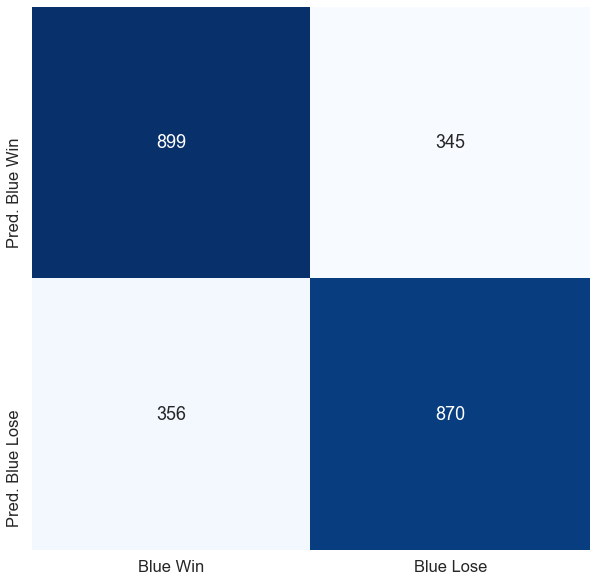

In [106]:
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Blue Win', 'Blue Lose'], yticklabels=['Pred. Blue Win', 'Pred. Blue Lose'])

In [107]:
feature_imp2 = pd.Series(rf2.feature_importances_, index=new_feature_list).sort_values(ascending=False)
feature_imp2

blueGoldDiff                    0.103852
redGoldDiff                     0.086246
blueExperienceDiff              0.084949
redExperienceDiff               0.068172
blueGoldPerMin                  0.058029
blueTotalGold                   0.052936
redTotalGold                    0.049735
redGoldPerMin                   0.048885
blueTotalExperience             0.048613
redTotalExperience              0.043636
redTotalJungleMinionsKilled     0.034352
redCSPerMin                     0.033997
blueTotalJungleMinionsKilled    0.032895
redTotalMinionsKilled           0.032438
blueTotalMinionsKilled          0.032438
blueCSPerMin                    0.032363
blueWardsPlaced                 0.031165
redWardsPlaced                  0.030712
blueAssists                     0.027006
redAssists                      0.026941
redWardsDestroyed               0.020814
blueWardsDestroyed              0.019828
dtype: float64

No handles with labels found to put in legend.


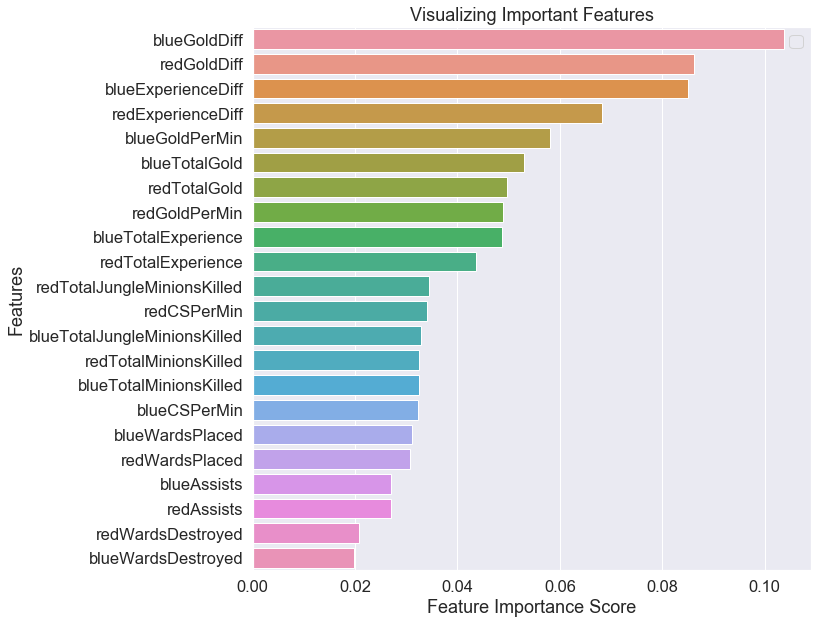

In [108]:
sns.barplot(x=feature_imp2, y=feature_imp2.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# EDA EDA EDA EDA EDA EDA EDA

In [109]:
cols = ['gameId', 'redFirstBlood', 'redKills', 'redEliteMonsters', 'redDragons','redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redHeralds',
       'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'blueTotalMinionsKilled']
df_clean = df.drop(cols, axis = 1)

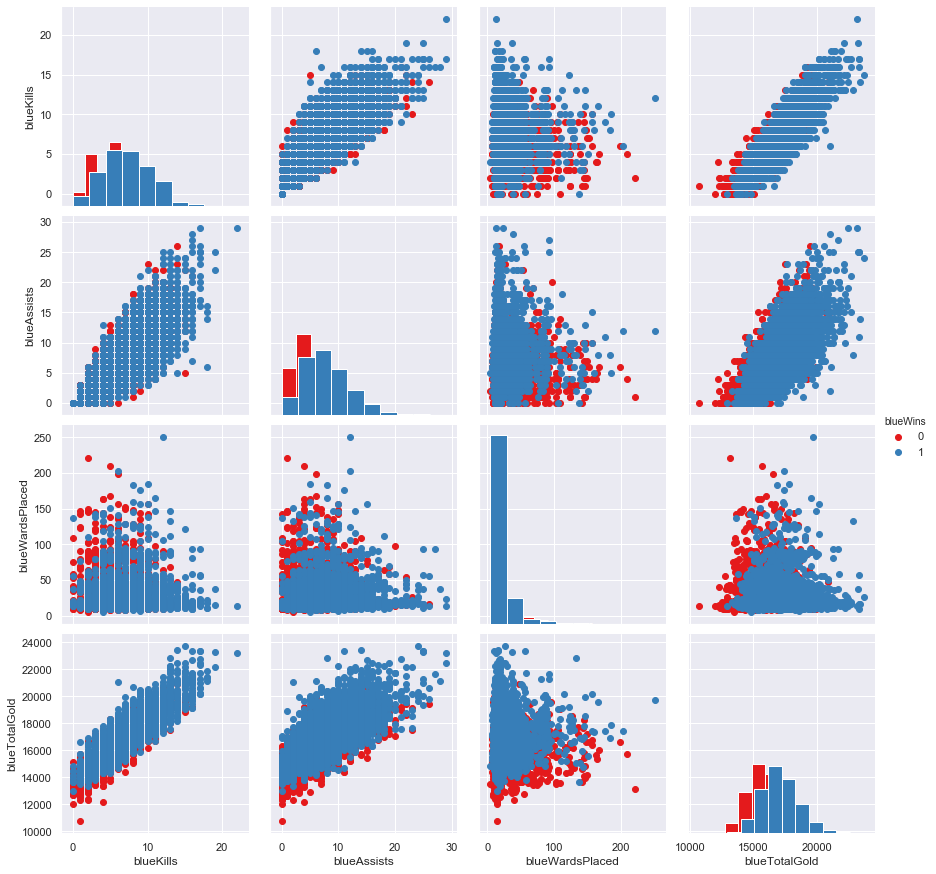

In [114]:
g = sns.PairGrid(data=df_clean, vars=['blueKills', 'blueAssists', 'blueWardsPlaced', 'blueTotalGold'], hue='blueWins', height=3, palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

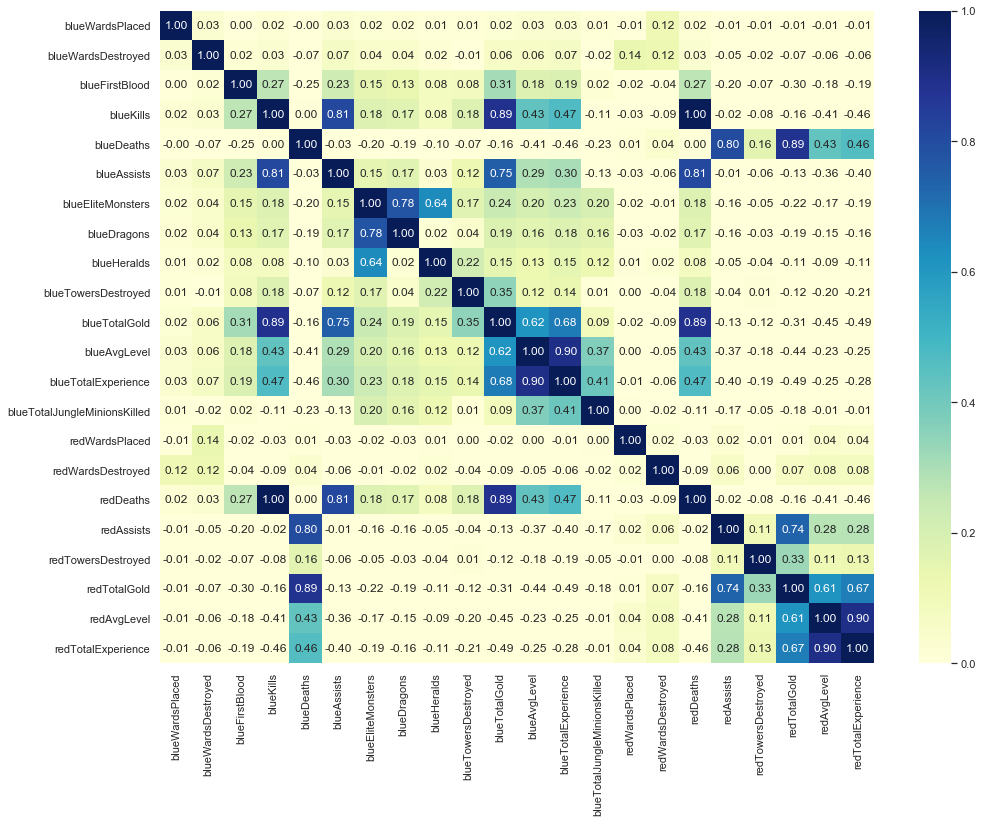

In [115]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_clean.drop('blueWins', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

In [116]:
cols = ['blueAvgLevel', 'redAvgLevel', 'redTotalGold']
df_clean = df_clean.drop(cols, axis=1)

In [117]:
corr_list = df_clean[df_clean.columns[1:]].apply(lambda x: x.corr(df_clean['blueWins']))
cols = []
for col in corr_list.index:
    if (corr_list[col]>0.3 or corr_list[col]<-0.3):
        cols.append(col)
cols

['blueKills',
 'blueDeaths',
 'blueTotalGold',
 'blueTotalExperience',
 'redDeaths',
 'redTotalExperience']

In [122]:
df_clean = df_clean[cols]
df_clean.head()

,blueKills,blueDeaths,blueTotalGold,blueTotalExperience,redDeaths,redTotalExperience
0,9,6,17210,17039,9,17047
1,5,5,14712,16265,5,17438
2,7,11,16113,16221,7,17254
3,4,5,15157,17954,4,17961
4,6,6,16400,18543,6,18313


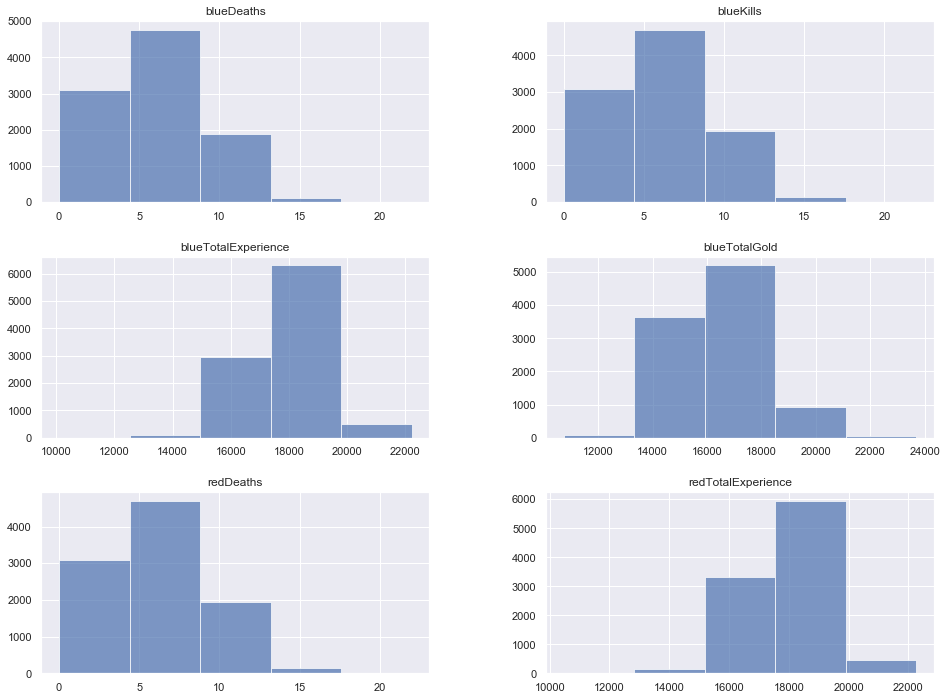

In [119]:
df_clean.hist(alpha = 0.7, figsize=(16,12), bins=5);

In [123]:
y = np.array(df['blueWins'])

X = df_clean
feature_list = list(X.columns)

X = np.array(X)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [126]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (7409, 6)
Training Labels Shape: (7409,)
Testing Features Shape: (2470, 6)
Testing Labels Shape: (2470,)


In [127]:
rf3 = RandomForestClassifier(n_estimators = 100, random_state = 2)

rf3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [128]:
y_pred = rf3.predict(X_test)
y_pred = np.rint(y_pred)

In [129]:
print("Accuracy: " + str(metrics.accuracy_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print('Specificity: %f' %(tp / (tp + fp)))
print('Sensitivity: %f' %(tn / (tn + fn)))

Accuracy: 0.7153846153846154
Specificity: 0.715581
Sensitivity: 0.715195


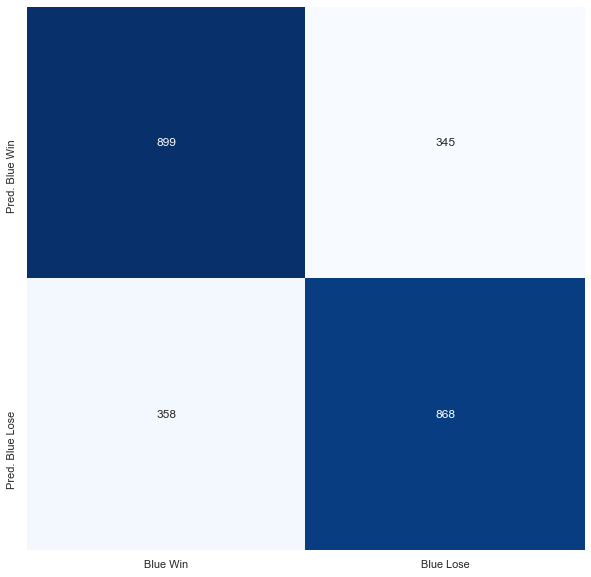

In [130]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Blue Win', 'Blue Lose'], yticklabels=['Pred. Blue Win', 'Pred. Blue Lose'])

In [134]:
feature_imp = pd.Series(rf3.feature_importances_, index=df_clean.columns).sort_values(ascending=False)
feature_imp

blueTotalGold          0.276126
redTotalExperience     0.256071
blueTotalExperience    0.248859
blueDeaths             0.117639
blueKills              0.053532
redDeaths              0.047773
dtype: float64

No handles with labels found to put in legend.


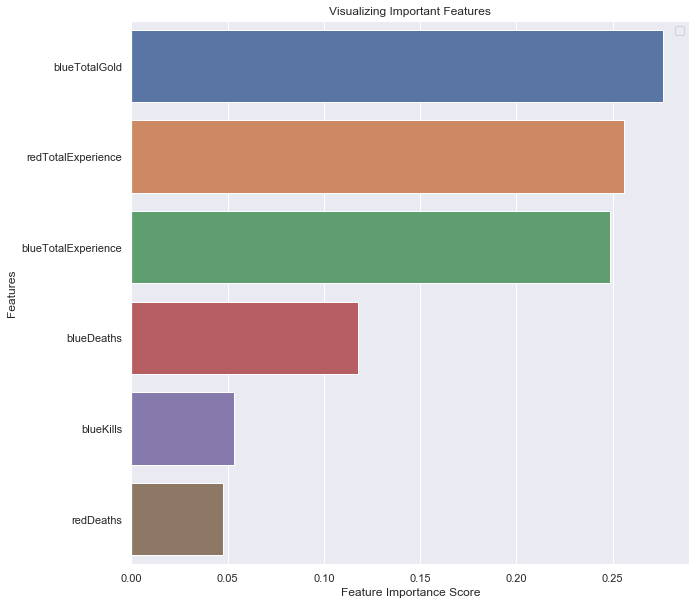

In [135]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()